Nie korzystać z SKlerna, 
korzystać z tensorflow
my projektujemy sieć neuronową
łatwy gradnient
TEnsor

Zdefiniwanie modelu
i forward

przetesowac optimazery
SGD - stochastyczny gradient


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

# - TensorFlow - 
import matplotlib.pylab as plt

from ucimlrepo import fetch_ucirepo


# Przeprocesowanie zbioru danych

In [18]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
Y = heart_disease.data.targets

Y = Y['num'].replace([1, 2, 3, 4], 1)

X['num'] = Y

median = X['ca'].median()
X['ca'].fillna(median, inplace=True)
mode_category = X['thal'].mode()[0]
X['thal'].fillna(mode_category, inplace=True)

In [19]:
def one_hot_encode(df, column, column_names):
    dummies = pd.get_dummies(df[column], prefix=column)
    column_names = [column + '_' + str(name) for name in column_names]
    dummies.columns = column_names
    dummies = dummies.astype('int64')
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [20]:
X =  one_hot_encode(X, 'cp', ['typical_angina', 'atypical_angina', 'non-anginal_pain', 'asymptomatic'])
X = one_hot_encode(X, 'thal', ['normal', 'ST-T_wave_abnormality', 'left_ventricular_hypertrophy'])
X = one_hot_encode(X, 'slope', ['upsloping', 'flat', 'downsloping'])
X = one_hot_encode(X, 'restecg', ['normal', 'fixed_defect', 'reversable_defect'])

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    int64  
 1   sex                                303 non-null    int64  
 2   trestbps                           303 non-null    int64  
 3   chol                               303 non-null    int64  
 4   fbs                                303 non-null    int64  
 5   thalach                            303 non-null    int64  
 6   exang                              303 non-null    int64  
 7   oldpeak                            303 non-null    float64
 8   ca                                 303 non-null    float64
 9   num                                303 non-null    int64  
 10  cp_typical_angina                  303 non-null    int64  
 11  cp_atypical_angina                 303 non-null    int64  

In [22]:
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.663366,0.458746,...,0.475248,0.554455,0.059406,0.386139,0.468647,0.462046,0.069307,0.498350,0.013201,0.488449
std,9.038662,0.467299,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.934375,0.499120,...,0.500213,0.497848,0.236774,0.487668,0.499842,0.499382,0.254395,0.500824,0.114325,0.500693
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:

Y = X['num']
X = X.drop('num', axis=1)

X_norm = (X - X.min()) / (X.max() - X.min())
X_norm.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_typical_angina,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.355564,0.275555,0.148515,0.600055,0.326733,0.167678,0.221122,0.075908,...,0.475248,0.554455,0.059406,0.386139,0.468647,0.462046,0.069307,0.498350,0.013201,0.488449
std,0.188305,0.467299,0.166035,0.118212,0.356198,0.174618,0.469794,0.187270,0.311458,0.265288,...,0.500213,0.497848,0.236774,0.487668,0.499842,0.499382,0.254395,0.500824,0.114325,0.500693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.262557,0.000000,0.625954,0.000000,0.129032,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,0.433962,0.340183,0.000000,0.725191,1.000000,0.258065,0.333333,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Adam
Epoch 100/1000, Loss: 0.3404
Epoch 200/1000, Loss: 0.2065
Epoch 300/1000, Loss: 0.5063
Epoch 400/1000, Loss: 1.6484
Epoch 500/1000, Loss: 0.1815
Epoch 600/1000, Loss: 0.1045
Epoch 700/1000, Loss: 0.0424
Epoch 800/1000, Loss: 0.3939
Epoch 900/1000, Loss: 0.4666
Epoch 1000/1000, Loss: 0.2547


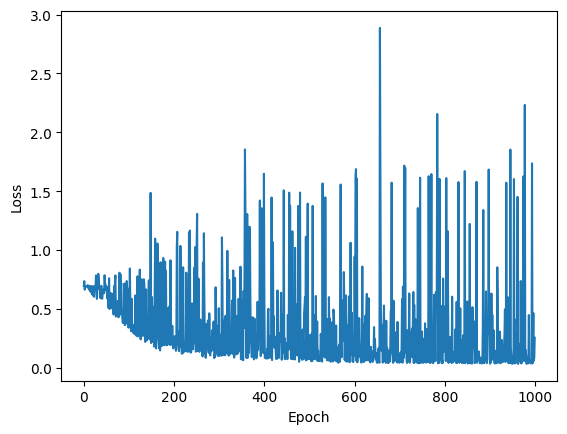

Accuracy: 0.8197
F1 Score: 0.8358
Precision: 0.8000
Recall: 0.8750
SGD
Epoch 100/1000, Loss: 0.5799
Epoch 200/1000, Loss: 0.7000
Epoch 300/1000, Loss: 0.7003
Epoch 400/1000, Loss: 0.6971
Epoch 500/1000, Loss: 0.5693
Epoch 600/1000, Loss: 0.8155
Epoch 700/1000, Loss: 0.7002
Epoch 800/1000, Loss: 0.5557
Epoch 900/1000, Loss: 0.7997
Epoch 1000/1000, Loss: 0.6828


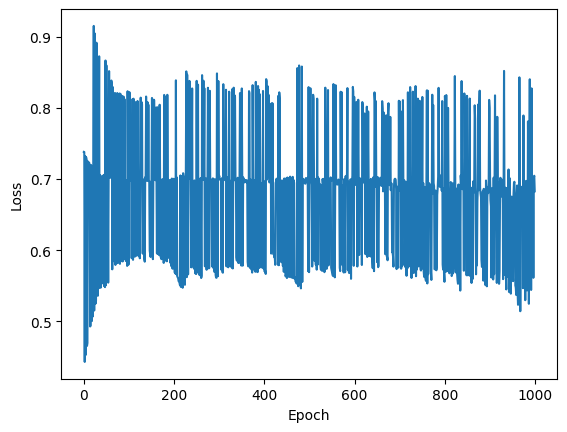

Accuracy: 0.4754
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
SGD2


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 100/1000, Loss: 0.6413
Epoch 200/1000, Loss: 0.7495
Epoch 300/1000, Loss: 0.6416
Epoch 400/1000, Loss: 0.4894
Epoch 500/1000, Loss: 1.4127
Epoch 600/1000, Loss: 0.2090
Epoch 700/1000, Loss: 0.3770
Epoch 800/1000, Loss: 0.4193
Epoch 900/1000, Loss: 0.9948
Epoch 1000/1000, Loss: 0.2658


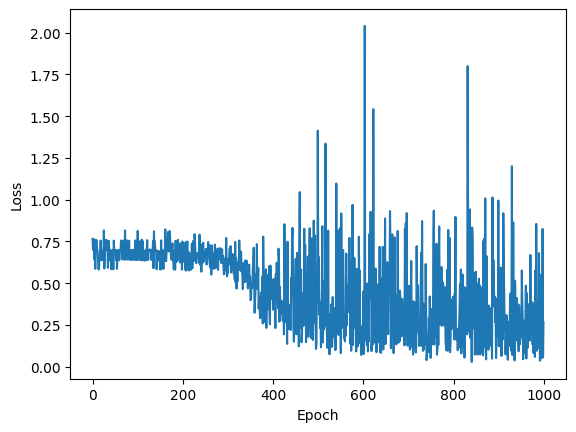

Accuracy: 0.8525
F1 Score: 0.8615
Precision: 0.8485
Recall: 0.8750


In [27]:
seed = 42
np.random.seed(seed)

import torch
import torch.nn as nn

class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FullyConnectedNetwork, self).__init__()
        self.hidden_layers = nn.ModuleList()
        prev_size = input_size
        for hidden_size in hidden_sizes:
            self.hidden_layers.append(nn.Linear(prev_size, hidden_size))
            prev_size = hidden_size
        self.output = nn.Linear(prev_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = self.sigmoid(x)
        x = self.output(x)
        return x

torch.manual_seed(seed)
hidden_layers = [8, 4]
lr = 0.001
modelSGD = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
modelSGD2 = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
modelAdam = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=seed)

# Convert to tensors
X_train = torch.from_numpy(X_train.values).float()
X_test = torch.from_numpy(X_test.values).float()
Y_train = torch.from_numpy(Y_train.values).float()
Y_test = torch.from_numpy(Y_test.values).float()

# Define the loss function and the optimizer SGD
criterion = nn.BCEWithLogitsLoss()
sgd = torch.optim.SGD(modelSGD.parameters(), lr=lr, momentum=0.9)
sgd2 = torch.optim.SGD(modelSGD2.parameters(), lr=lr, momentum=0.9)
adam = torch.optim.Adam(modelAdam.parameters(), lr=lr)

from torch.utils.data import TensorDataset, DataLoader

def train_model(model, criterion, optimizer, X_train, Y_train, epochs=1000, batch_size=30):
    losses = []
    
    dataset = TensorDataset(X_train, Y_train)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for e in range(epochs):
        for X_batch, Y_batch in data_loader:

            
            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            y_pred = model.forward(X_batch)

            # Compute Loss
            loss = criterion(y_pred.squeeze(), Y_batch)

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()

        # Record loss after each epoch
        losses.append(loss.item())

        if (e + 1) % 100 == 0:
            print(f'Epoch {e+1}/{epochs}, Loss: {loss.item():.4f}')

    return losses



def plot_loss(losses):
    plt.plot(range(epochs), losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

def evaluate_model(model):
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = torch.round(torch.sigmoid(y_pred))
        acc = accuracy_score(Y_test, y_pred)
        f1 = f1_score(Y_test, y_pred)
        precision = precision_score(Y_test, y_pred)
        recall = recall_score(Y_test, y_pred)

        print(f'Accuracy: {acc:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')


epochs = 1000
print('Adam')
lossesAdam = train_model(modelAdam, criterion, adam, X_train, Y_train, epochs)
plot_loss(lossesAdam)
evaluate_model(modelAdam)
print('SGD')
lossesSGD = train_model(modelSGD, criterion, sgd, X_train, Y_train, epochs)
plot_loss(lossesSGD)
evaluate_model(modelSGD)
print('SGD2')
lossesSGD2 = train_model(modelSGD2, criterion, sgd2, X_train, Y_train, epochs, 7)
plot_loss(lossesSGD2)
evaluate_model(modelSGD2)





W ćwiczeniu należy zbudować sieć o tych samych parametrach co w zadaniu
poprzednim, i ocenić jej działanie na tych samych danych, tym razem sprawdzając
wpływ:
• wybranego optimizera (SGD i dwa inne)
• rozmiaru batcha
• wartości współczynnika uczenia dla różnych optimizeró